<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/CNN_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
from google.colab import output

In [2]:
from keras.applications import VGG16
from keras.models import Model

import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd

# Dados

In [13]:
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [14]:
! cp kaggle.json ~/.kaggle/

In [15]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! kaggle competitions download -c dogs-vs-cats
output.clear()

In [17]:
! mkdir data
! unzip dogs-vs-cats.zip -d data
output.clear()

In [18]:
! mkdir data/train
! unzip data/train.zip -d data/train
output.clear()

In [19]:
! mkdir data/test
! unzip data/test1.zip -d data/test
output.clear()

In [20]:
train_path = '/content/data/train/train'
test_path = '/content/data/test/test1'

In [21]:
img_path = train_path + '/cat.64.jpg' #'/cat.64.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 224, 224, 3)


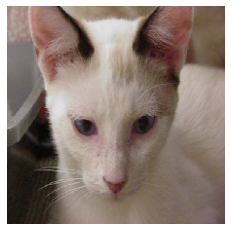

In [22]:
plt.imshow(img_tensor[0])
plt.axis('off')
plt.show()

# Instanciando a rede

In [23]:
vgg = VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

# Feature maps

In [24]:
layer_outputs = [layer.output for layer in vgg.layers if 'conv1' in layer.name]
model = Model(inputs=vgg.inputs, outputs=layer_outputs)
feature_maps = model.predict(img_tensor)

1/1 [==============================] - 1s 1s/step


## Feature map *x* da primeira camada convolucional dos 5 blocos

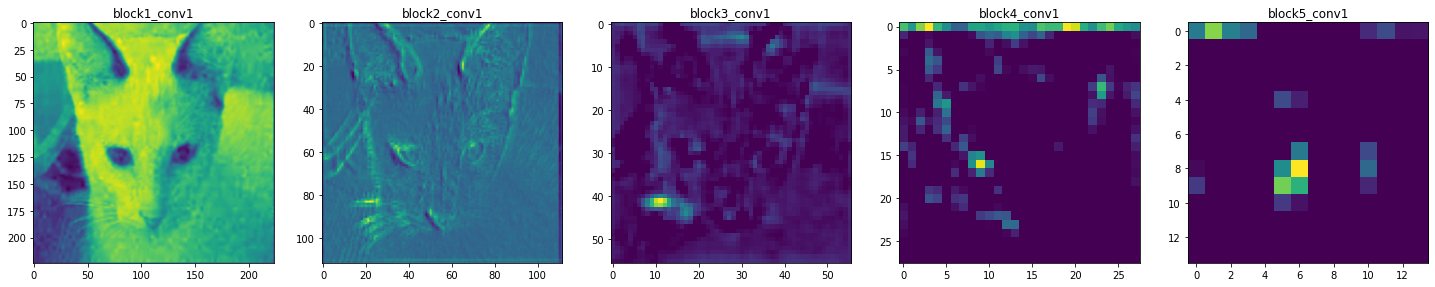

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_name_count = 0

feature_index = 25

for ax, layer_activation in zip(axs.flat, feature_maps):
  ax.imshow(layer_activation[0, :, :, feature_index], cmap='viridis')
  ax.set_title(str(layer_names[layer_name_count]))
  layer_name_count += 1

## Todos os feature maps da primeira camada convolucional do primeiro bloco

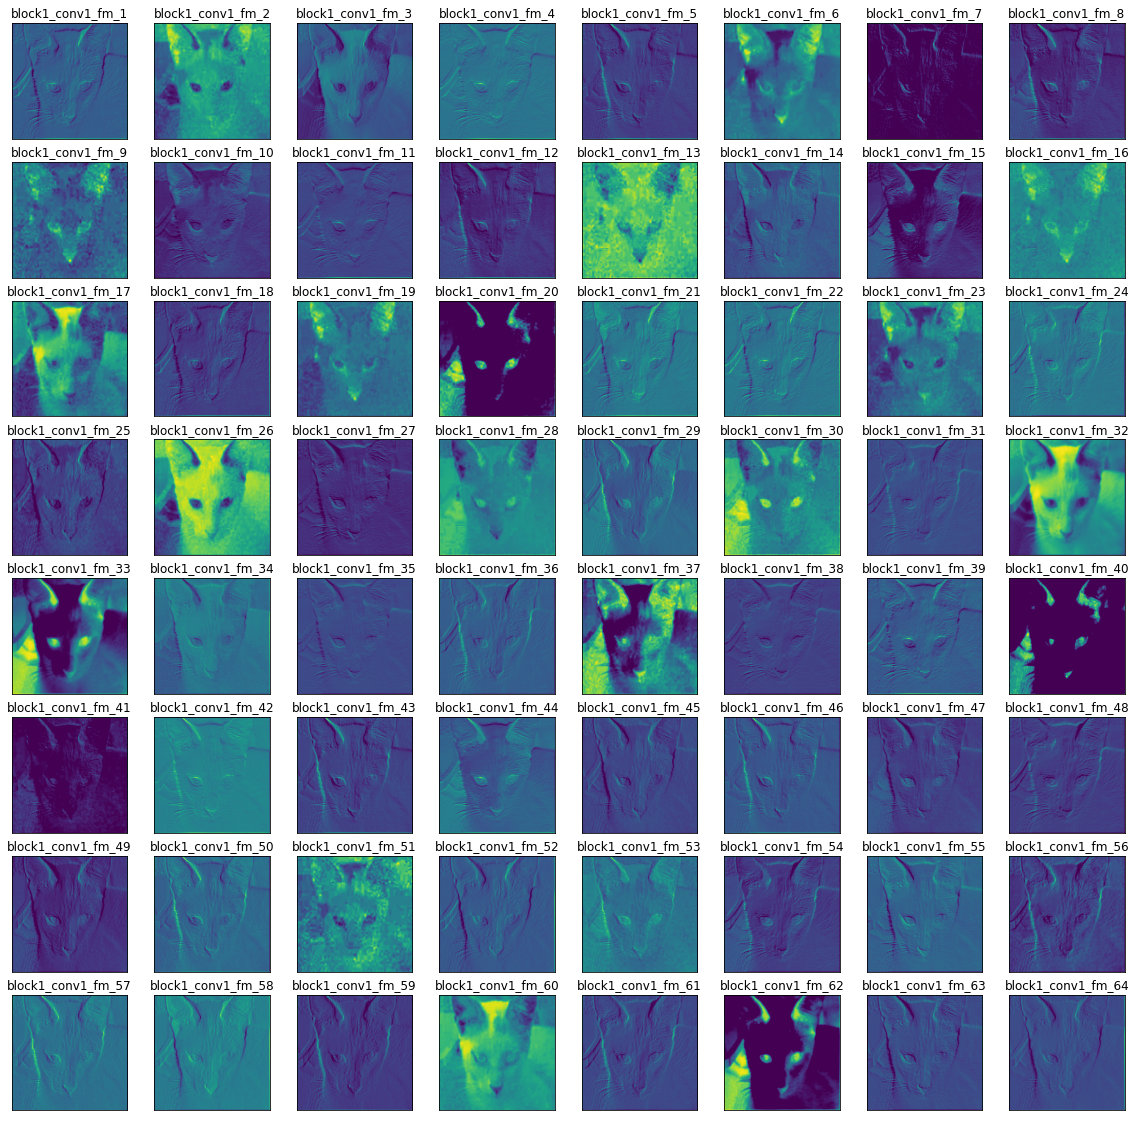

In [ ]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
feature_cont = 0
first_conv_feature_maps = feature_maps[0]

for ax in axs.flat:
  ax.imshow(first_conv_feature_maps[0, :, :, feature_cont], cmap='viridis')
  ax.set_title('block1_conv1_fm_' + str(feature_cont+1))
  feature_cont += 1

## 64 feature maps da primeira camada convolucional do quinto/último bloco

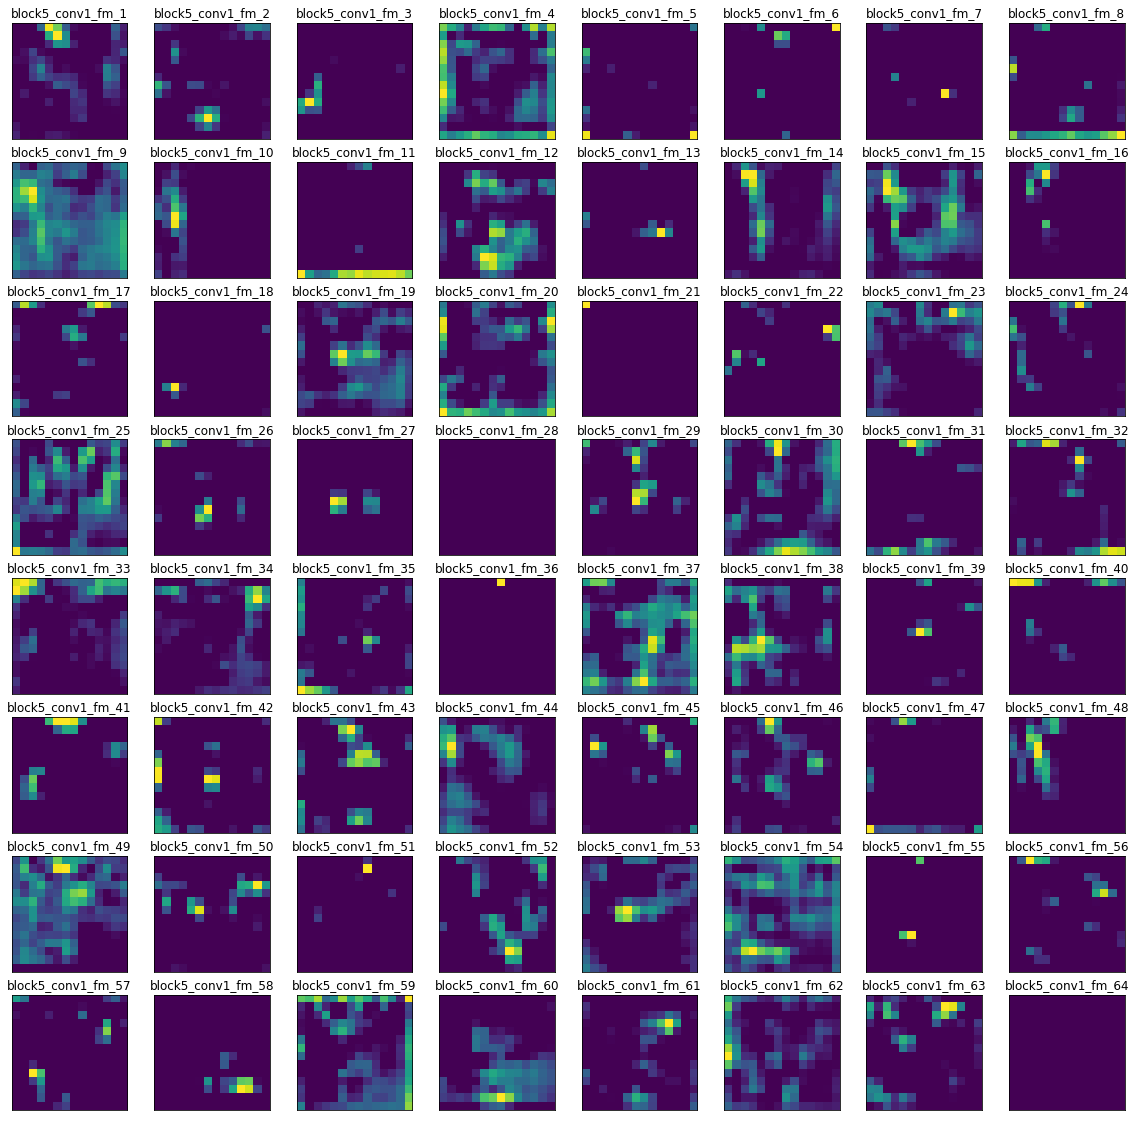

In [ ]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
feature_cont = 0
first_conv_feature_maps = feature_maps[4]

for ax in axs.flat:
  ax.imshow(first_conv_feature_maps[0, :, :, feature_cont], cmap='viridis')
  ax.set_title('block5_conv1_fm_' + str(feature_cont+1))
  feature_cont += 1

# Filtros

In [ ]:
for layer in vgg.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, '->', filters.shape)

block1_conv1 -> (3, 3, 3, 64)
block1_conv2 -> (3, 3, 64, 64)
block2_conv1 -> (3, 3, 64, 128)
block2_conv2 -> (3, 3, 128, 128)
block3_conv1 -> (3, 3, 128, 256)
block3_conv2 -> (3, 3, 256, 256)
block3_conv3 -> (3, 3, 256, 256)
block4_conv1 -> (3, 3, 256, 512)
block4_conv2 -> (3, 3, 512, 512)
block4_conv3 -> (3, 3, 512, 512)
block5_conv1 -> (3, 3, 512, 512)
block5_conv2 -> (3, 3, 512, 512)
block5_conv3 -> (3, 3, 512, 512)


## Filtro *x* da primeira camada convolucional dos 5 blocos

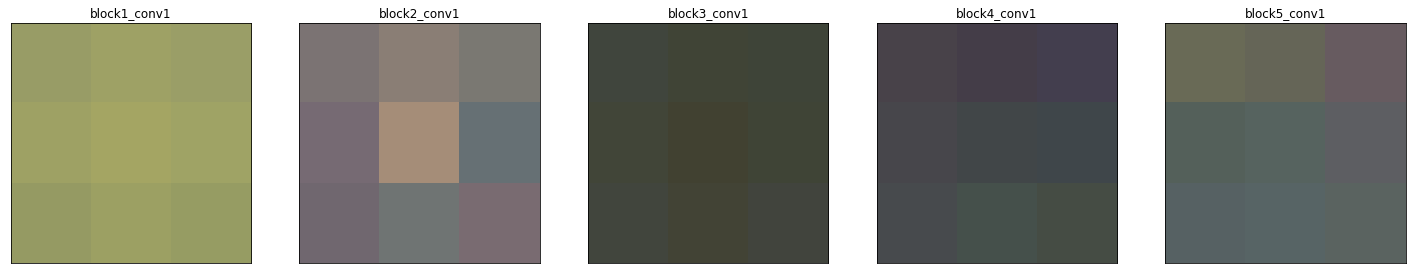

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), subplot_kw={'xticks': [], 'yticks': []})

layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layer_index = [1, 4, 7, 11, 15]
layer_count = 0
filter_index = 25

for ax in axs.flat:
  filters, biases = vgg.layers[layer_index[layer_count]].get_weights()

  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)

  ax.imshow(filters[:, :, 0:3, filter_index], cmap='viridis')
  ax.set_title(str(layer_names[layer_count]))
  layer_count += 1

## Todos os filtros da primeira camada convolucional do primeiro bloco

In [ ]:
filters, biases = vgg.layers[1].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

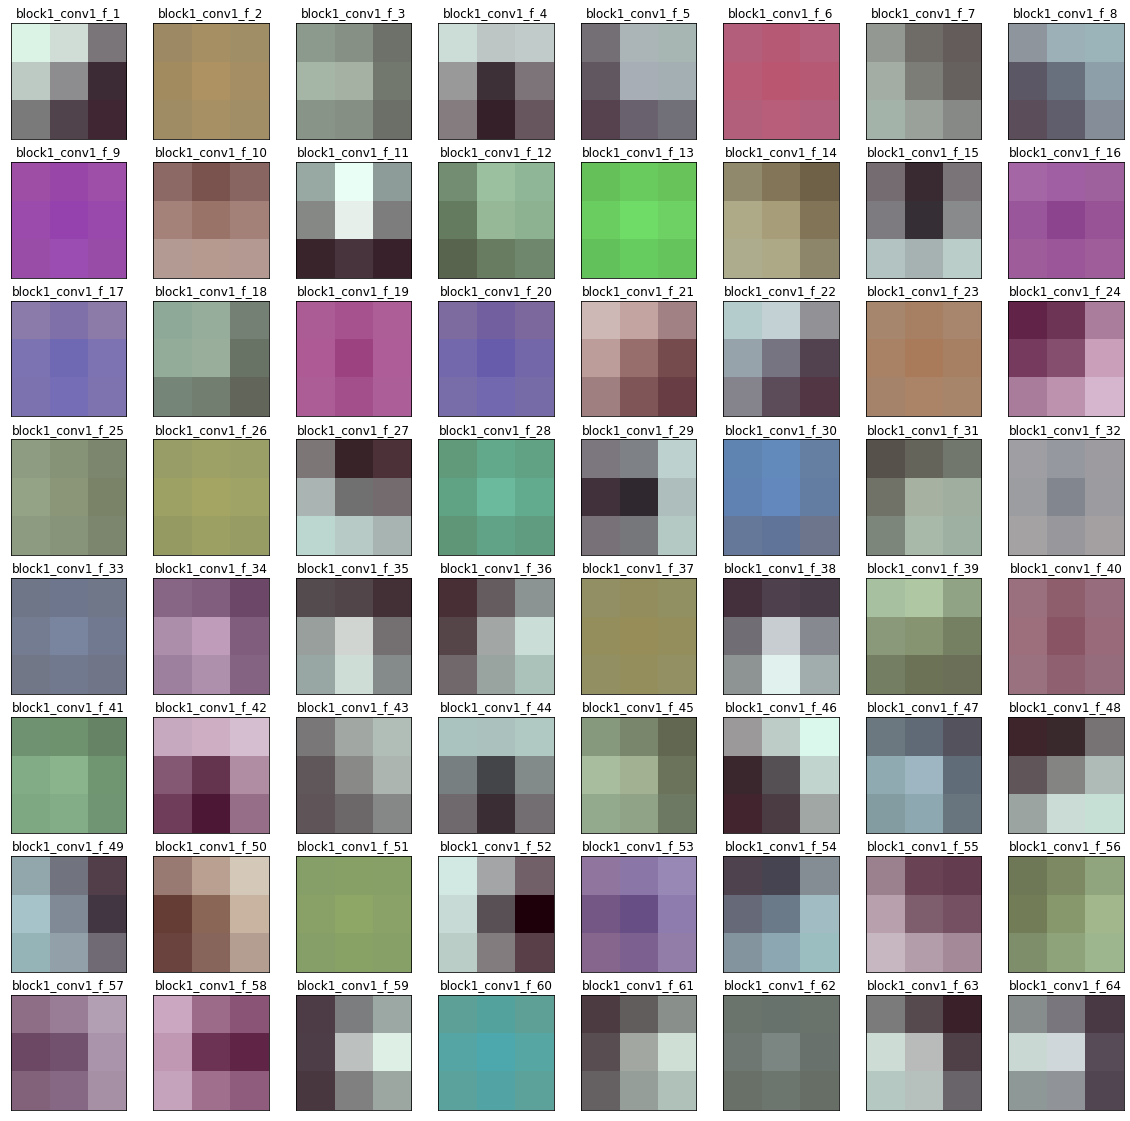

In [ ]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
feature_count = 0

for ax in axs.flat:
  ax.imshow(filters[:, :, :, feature_count], cmap='viridis')
  ax.set_title('block1_conv1_f_' + str(feature_count+1))
  feature_count += 1

# Análise geral

In [125]:
successive_outputs = [layer.output for layer in vgg.layers[1:]]
visualization_model = Model(inputs=vgg.inputs, outputs=successive_outputs)
successive_feature_maps = visualization_model.predict(img_tensor)

1/1 [==============================] - 2s 2s/step


In [122]:
feature_maps = visualization_model.predict(img_tensor)

1/1 [==============================] - 1s 660ms/step


In [123]:
len(feature_maps)

23

In [124]:
np.argmax(feature_maps[-1])

669

## Feature maps

<ipython-input-22-34758f63048a>:12: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


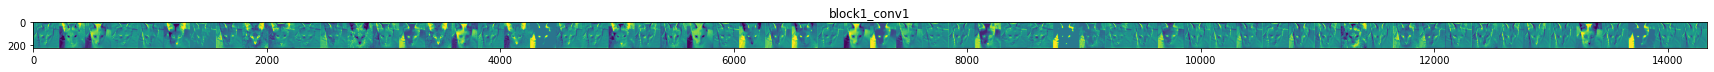

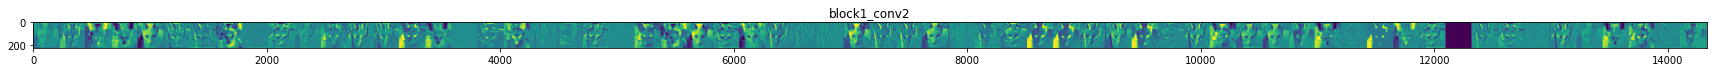

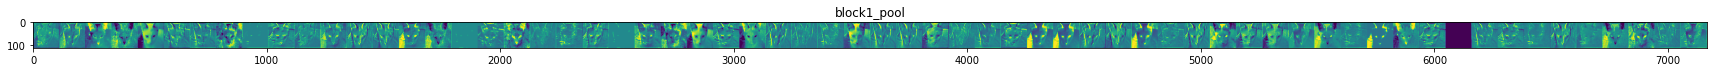

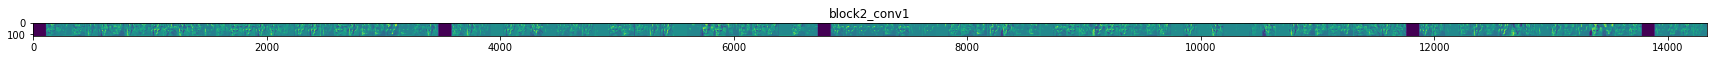

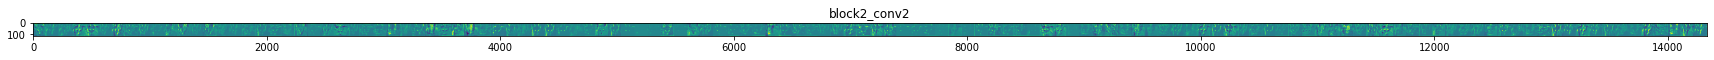

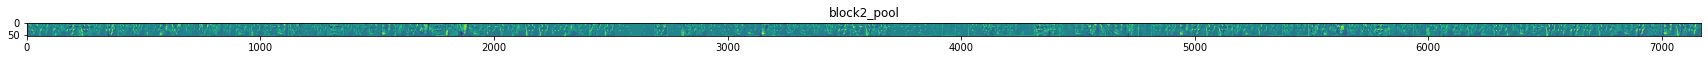

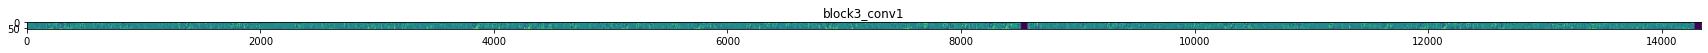

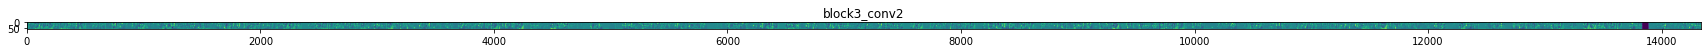

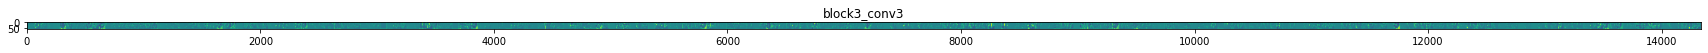

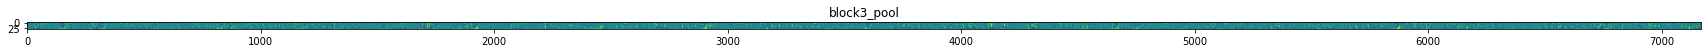

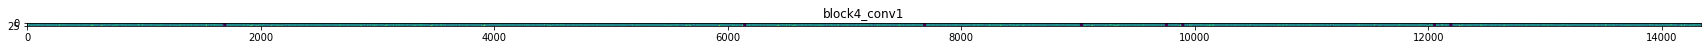

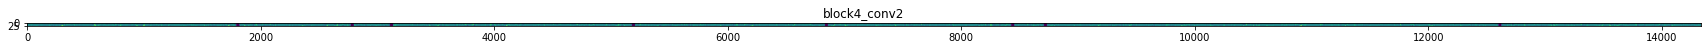

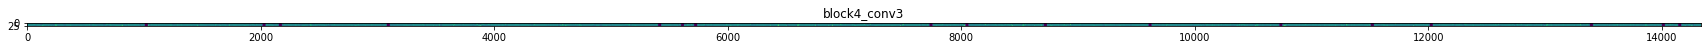

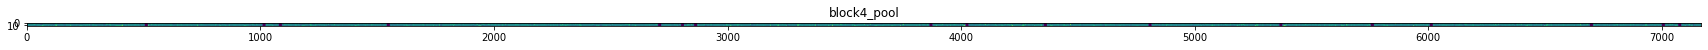

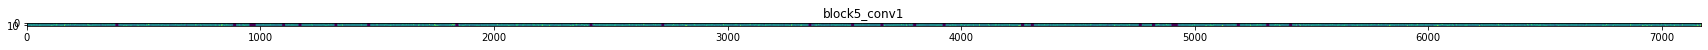

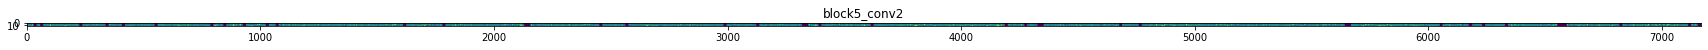

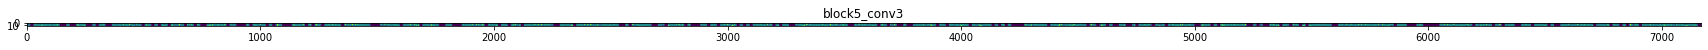

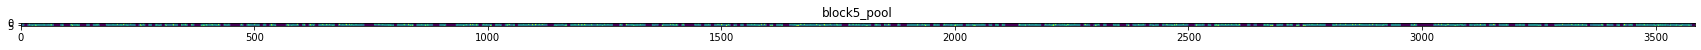

In [ ]:
layer_names = [layer.name for layer in vgg.layers[1:]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]  #(1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 30. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Filtros

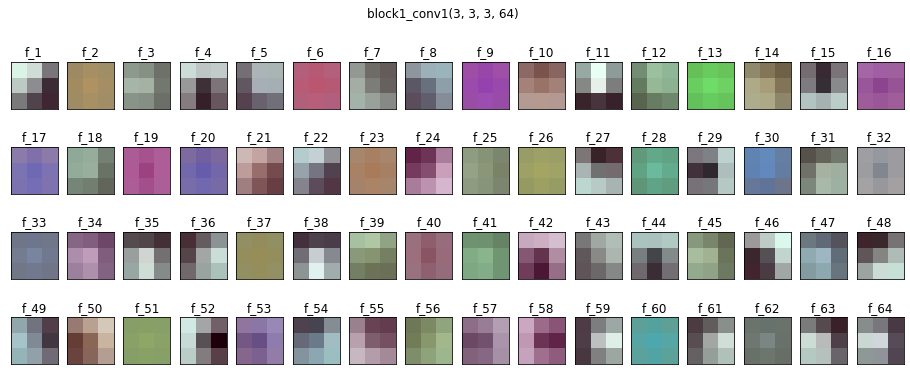

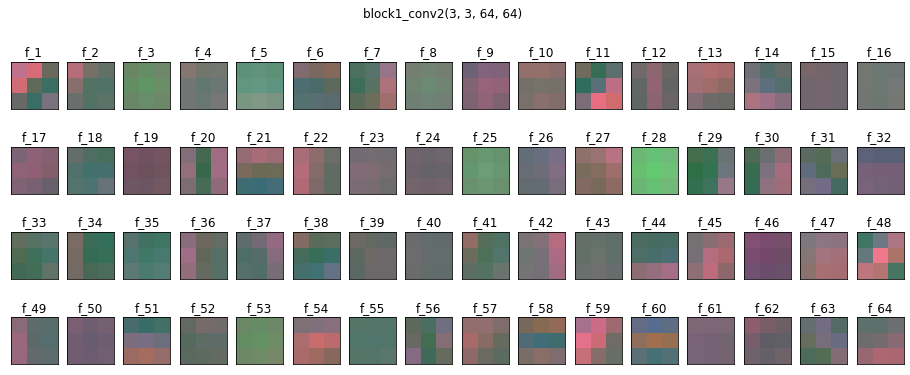

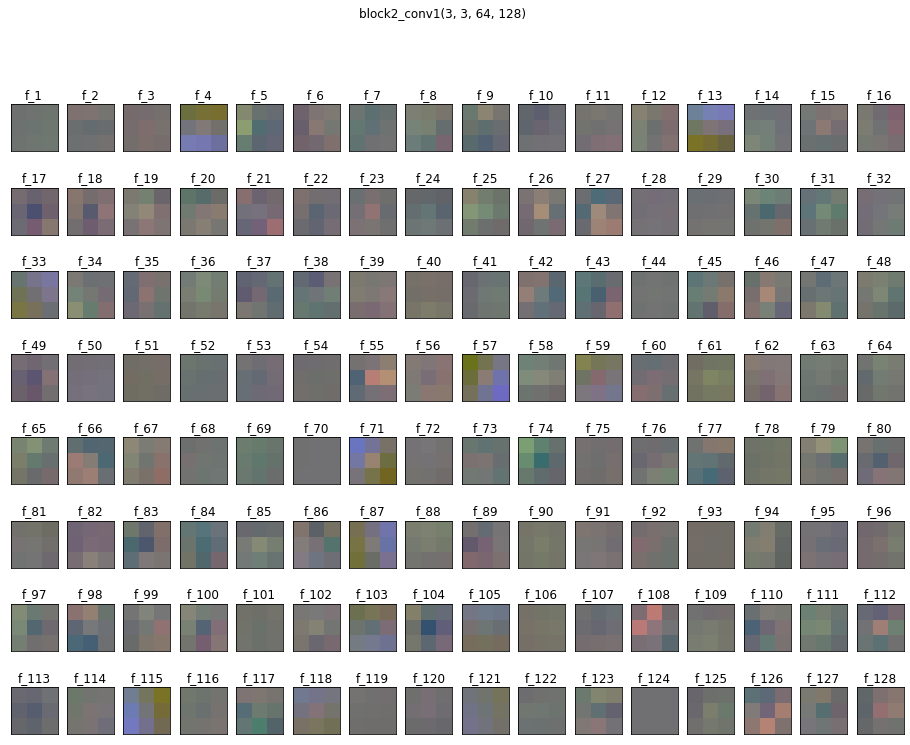

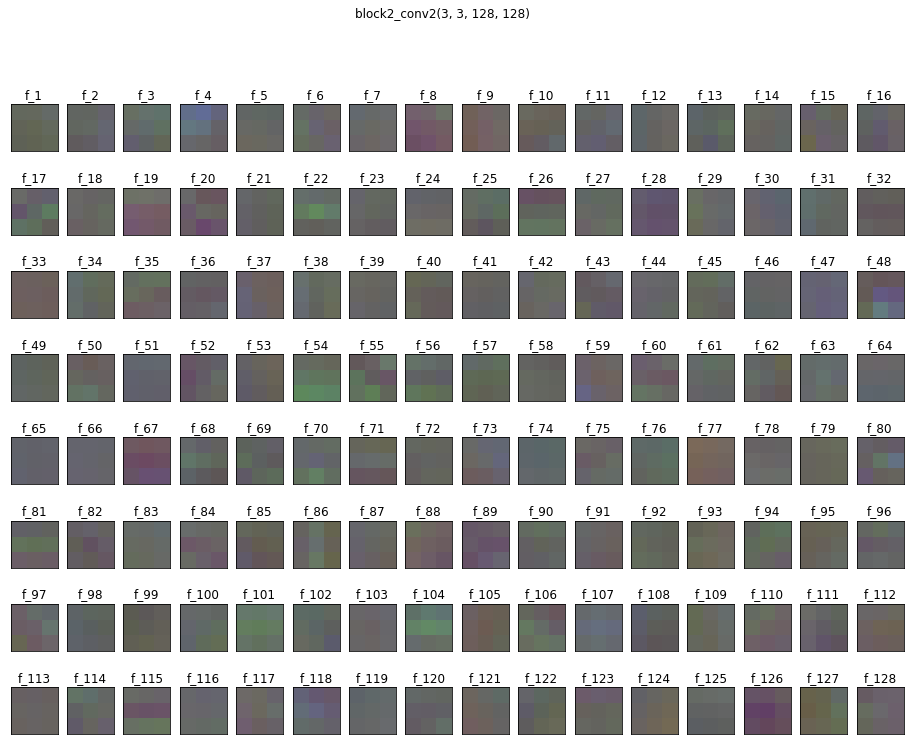

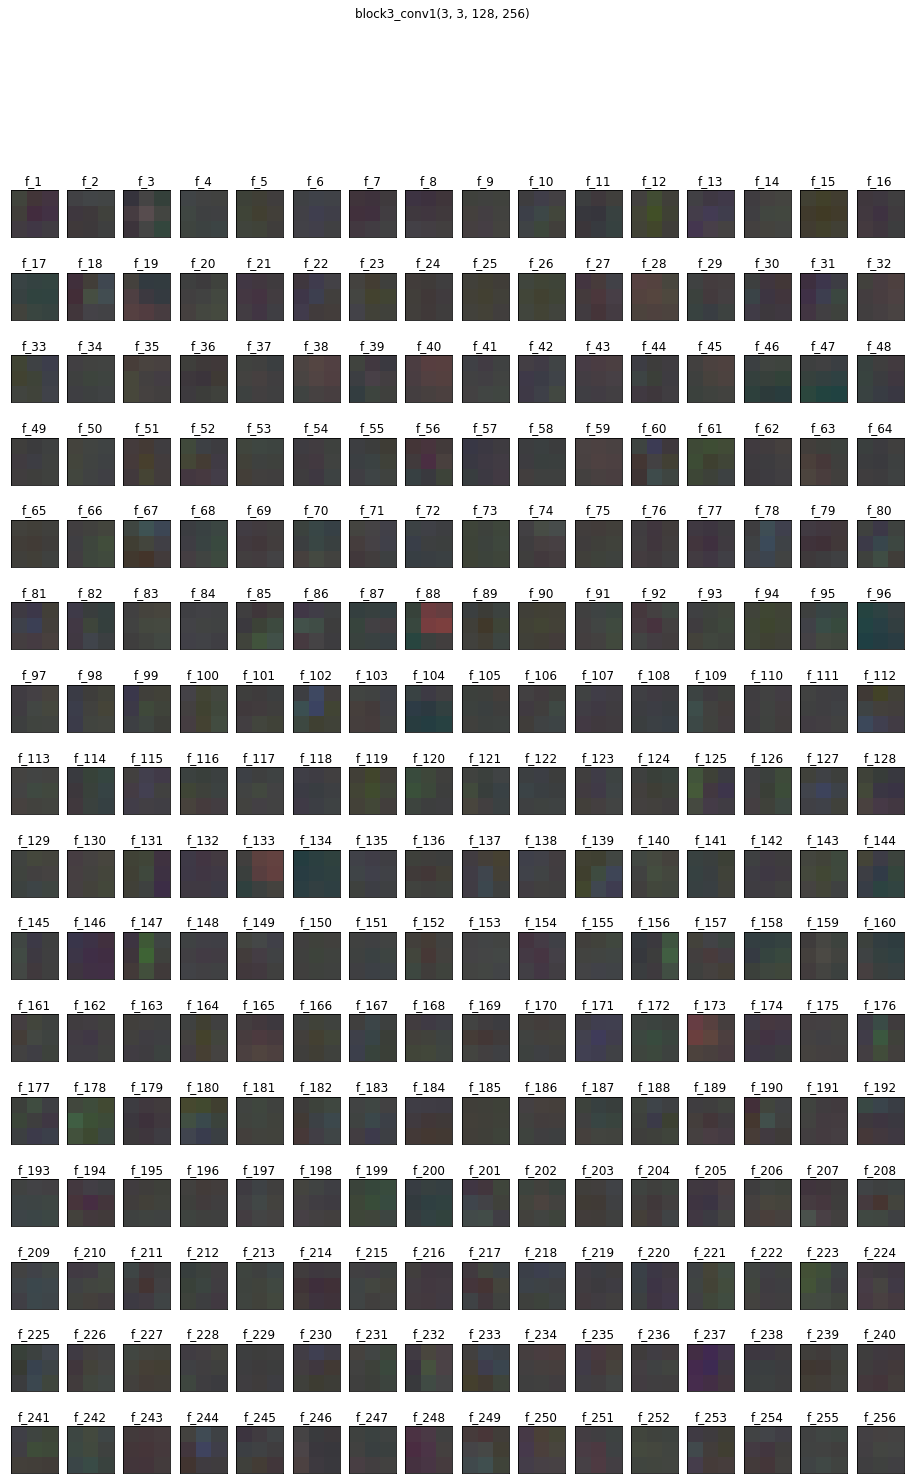

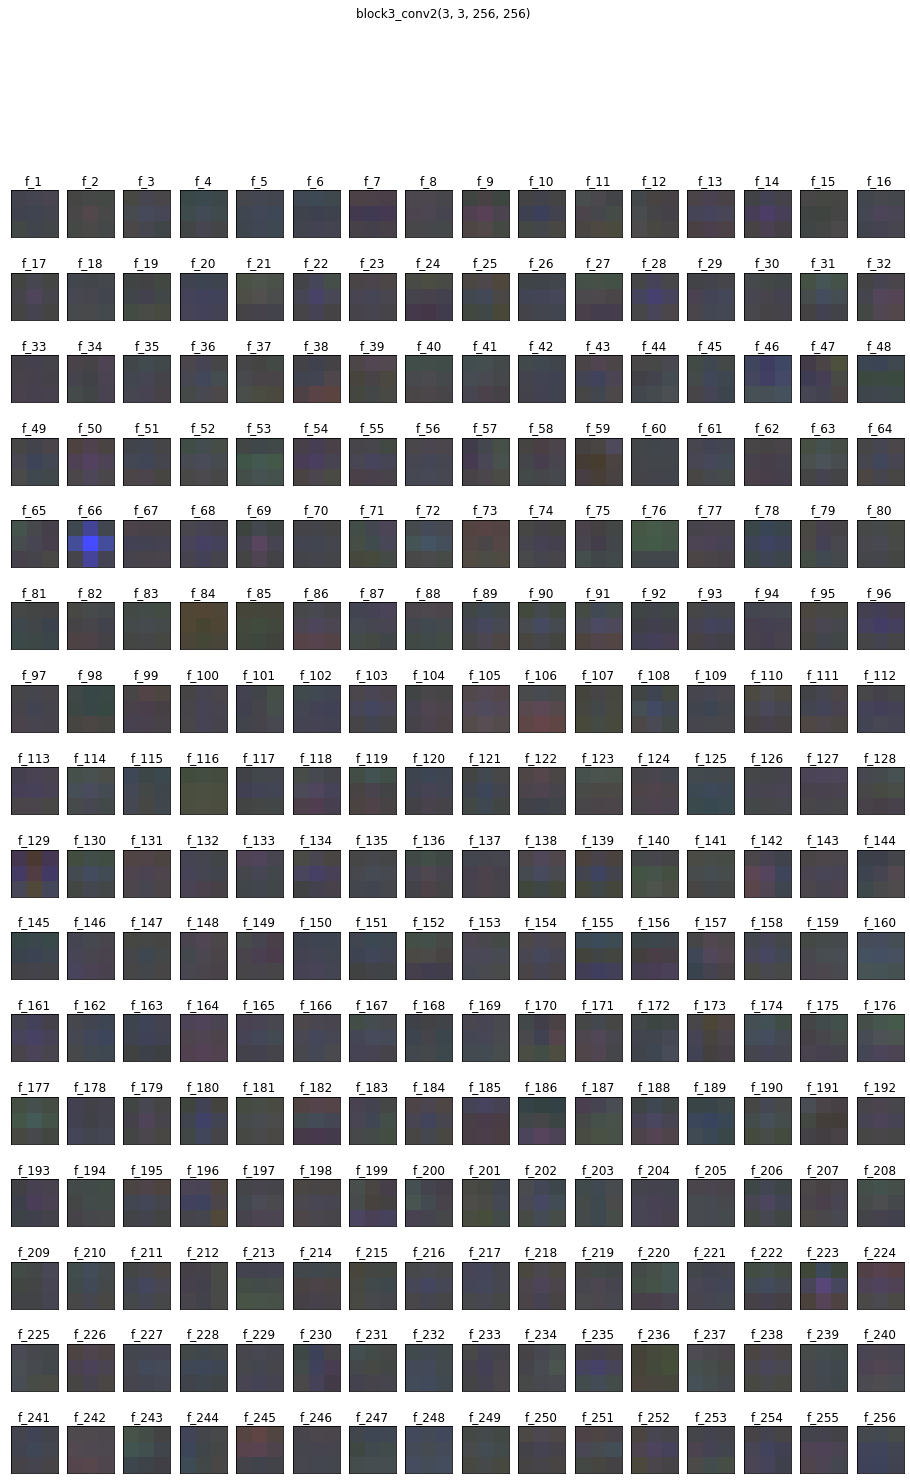

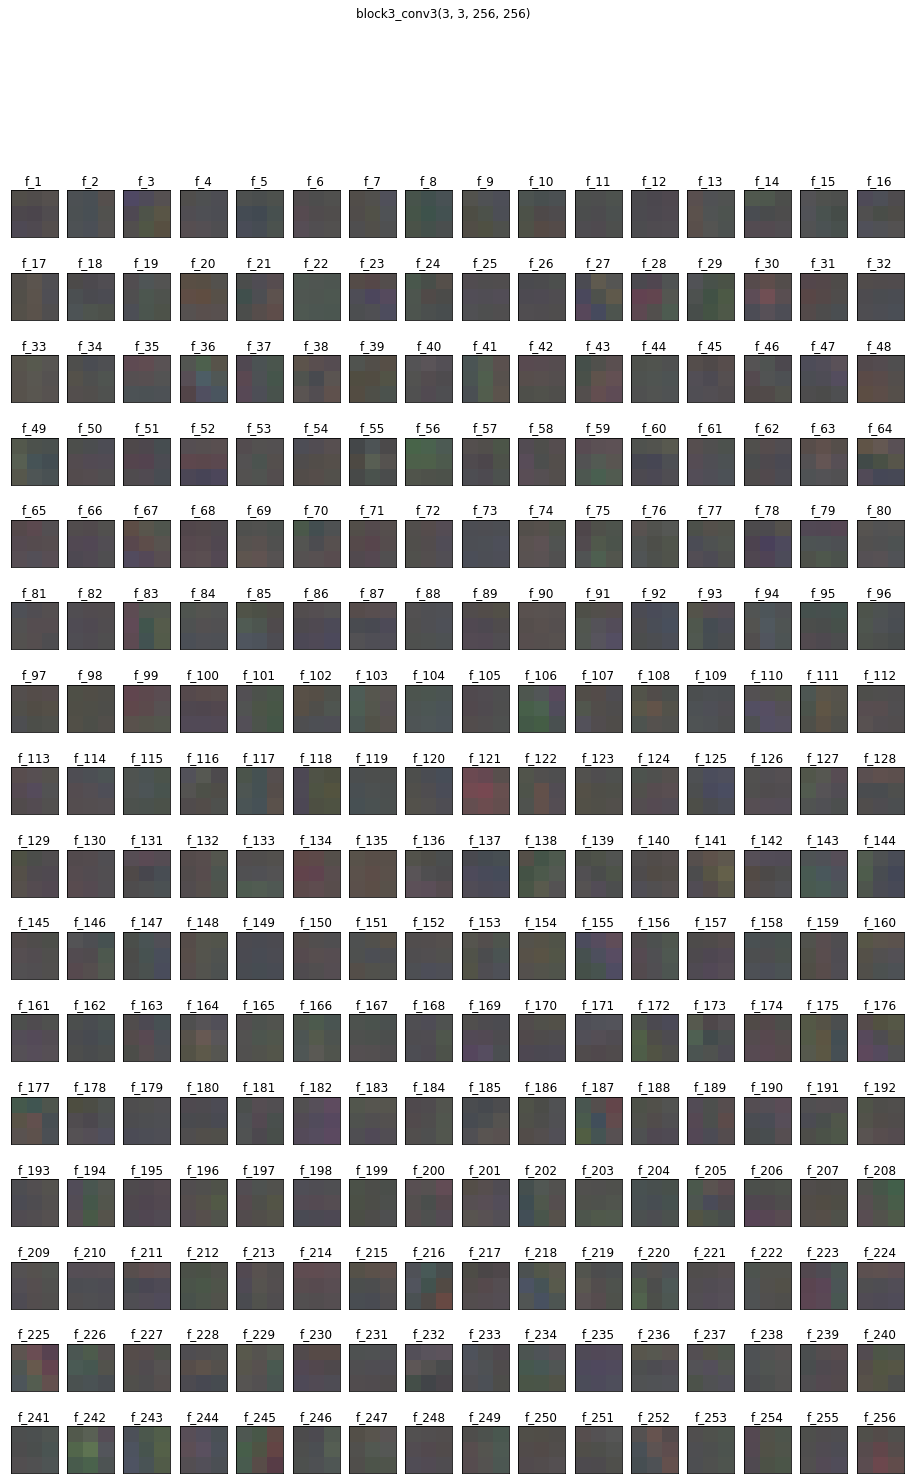

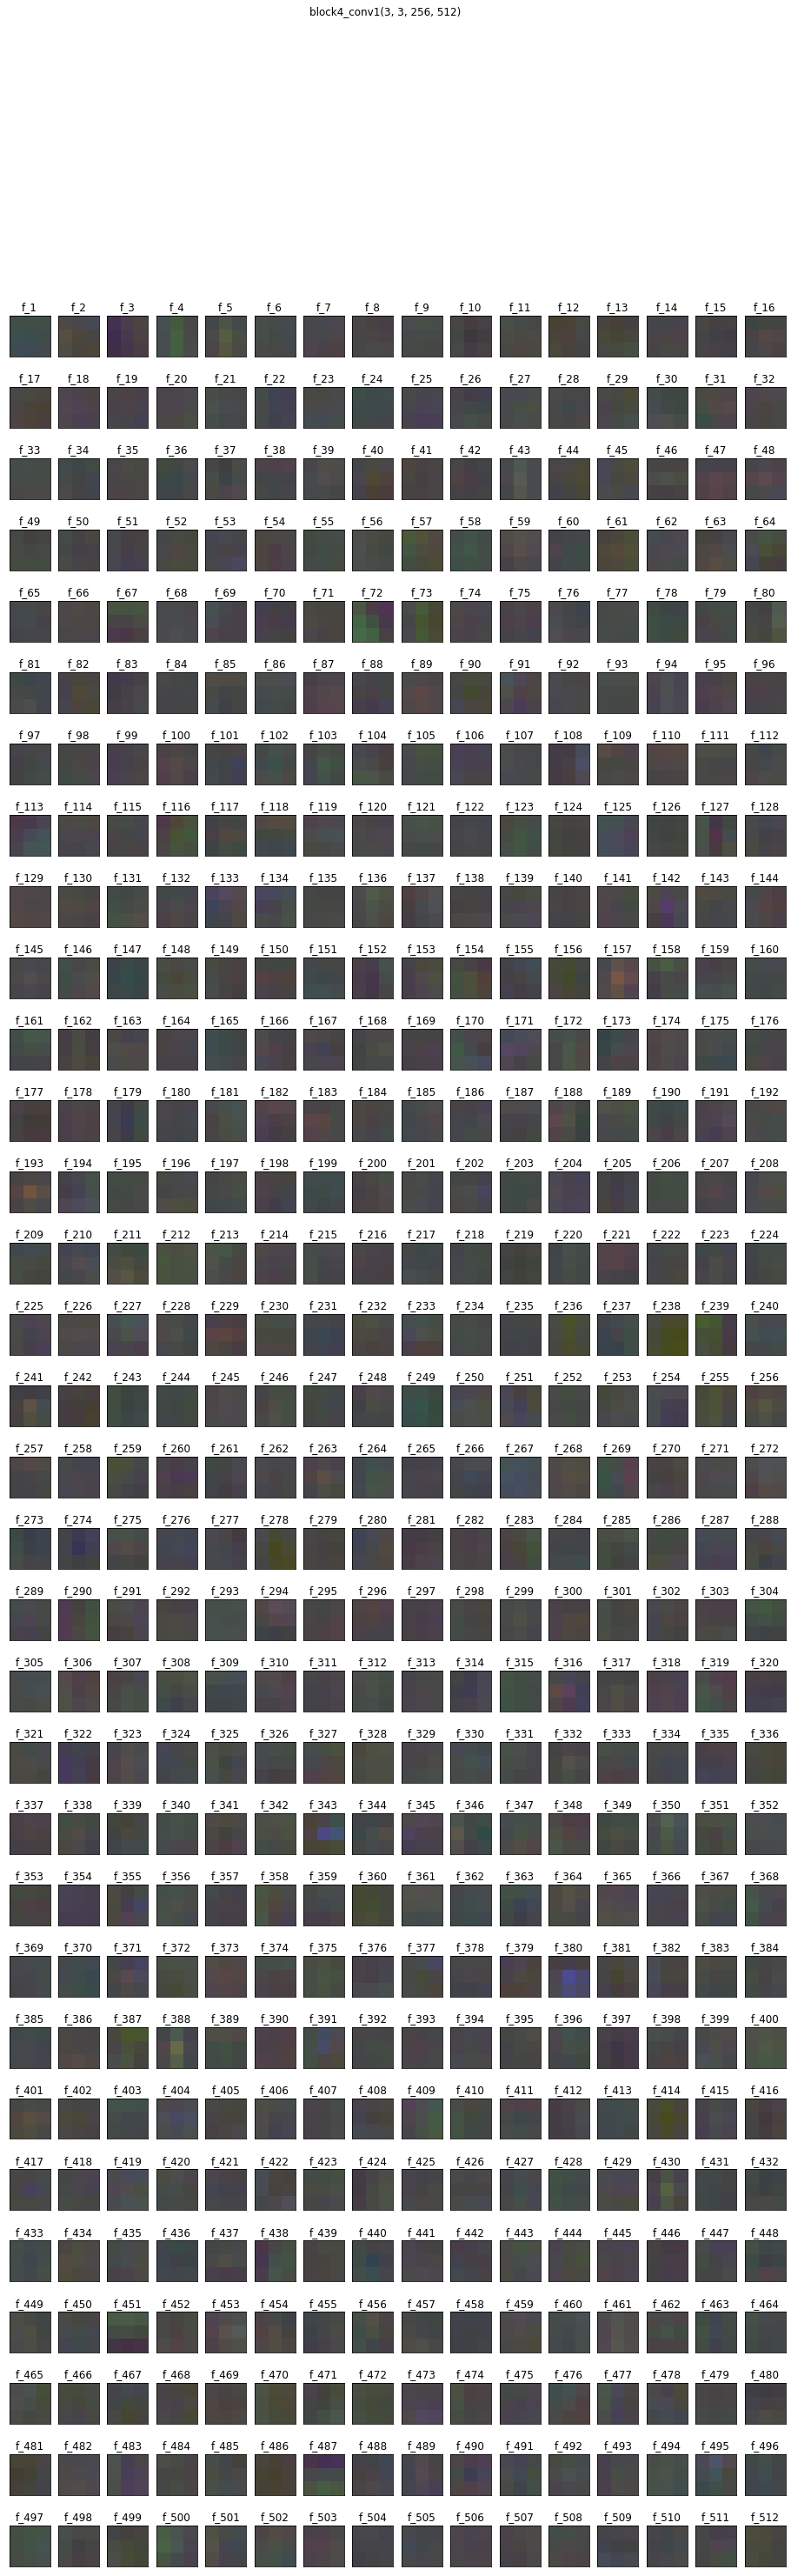

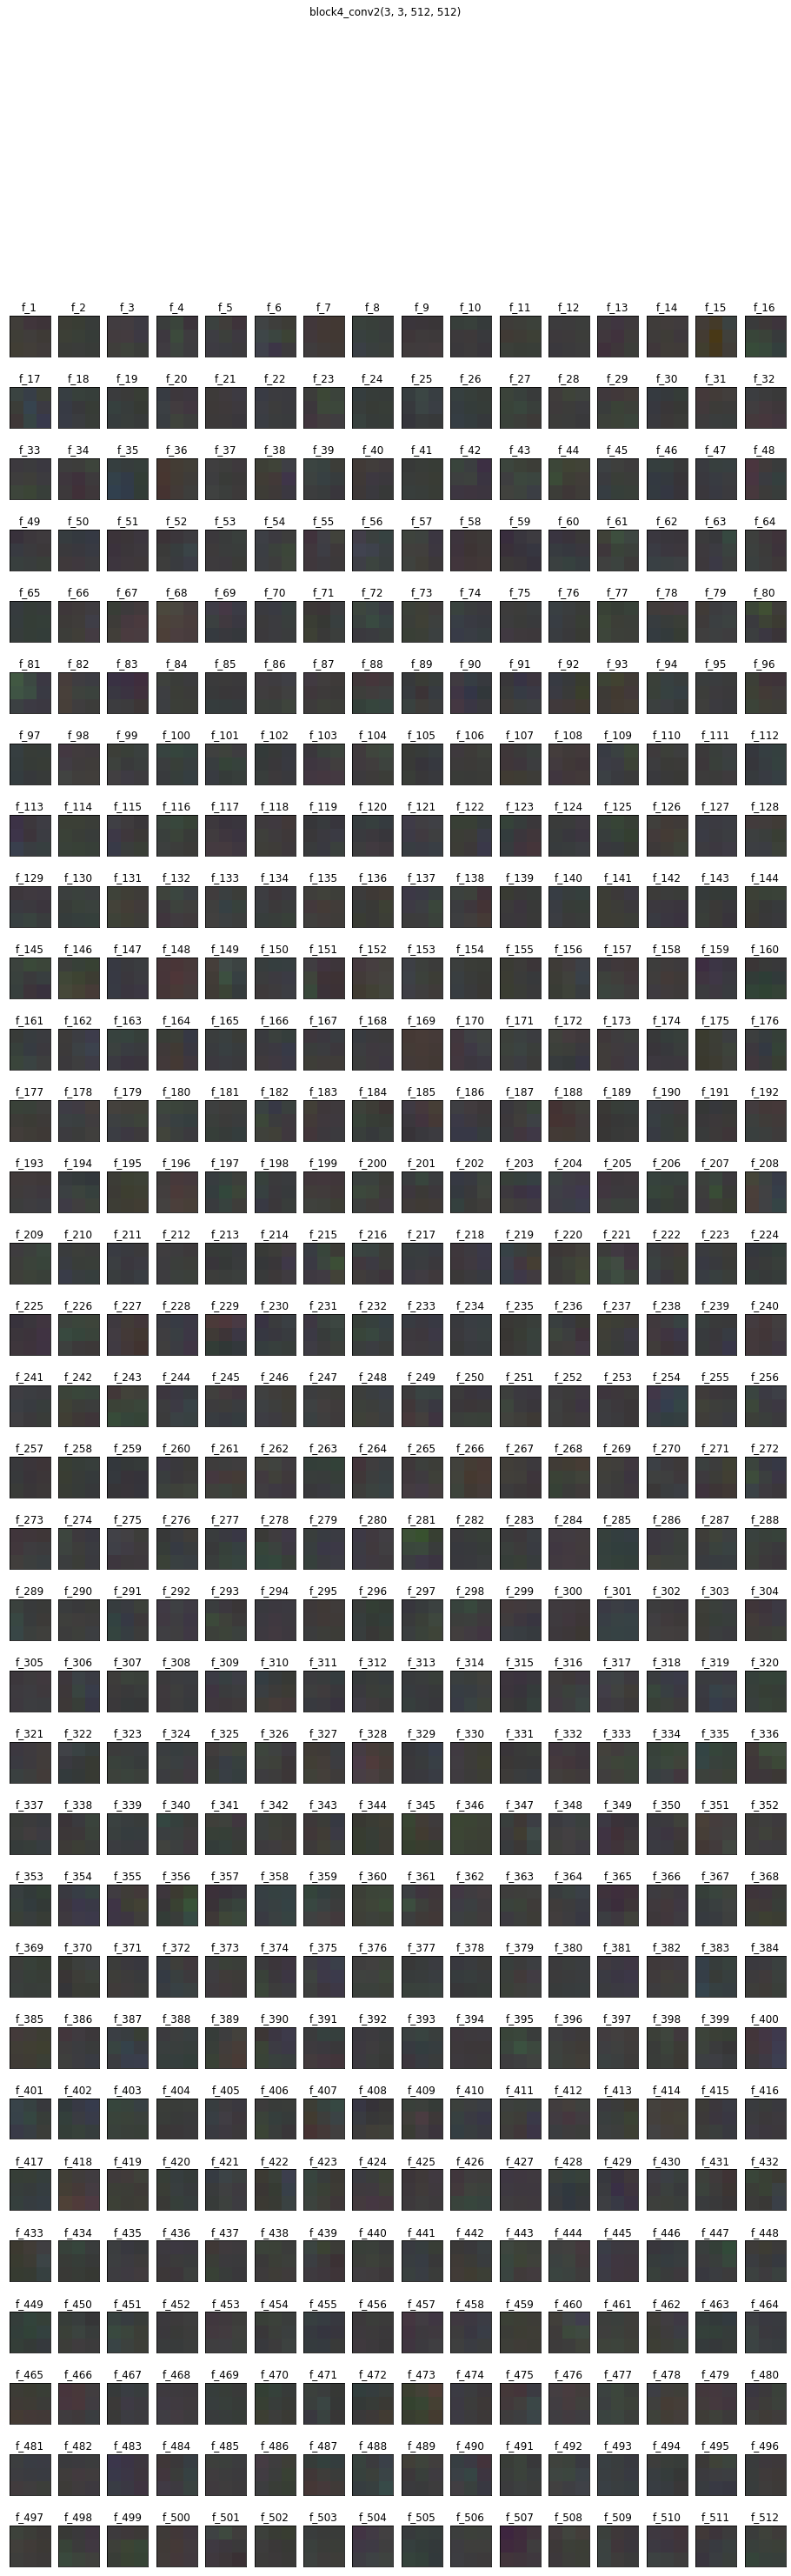

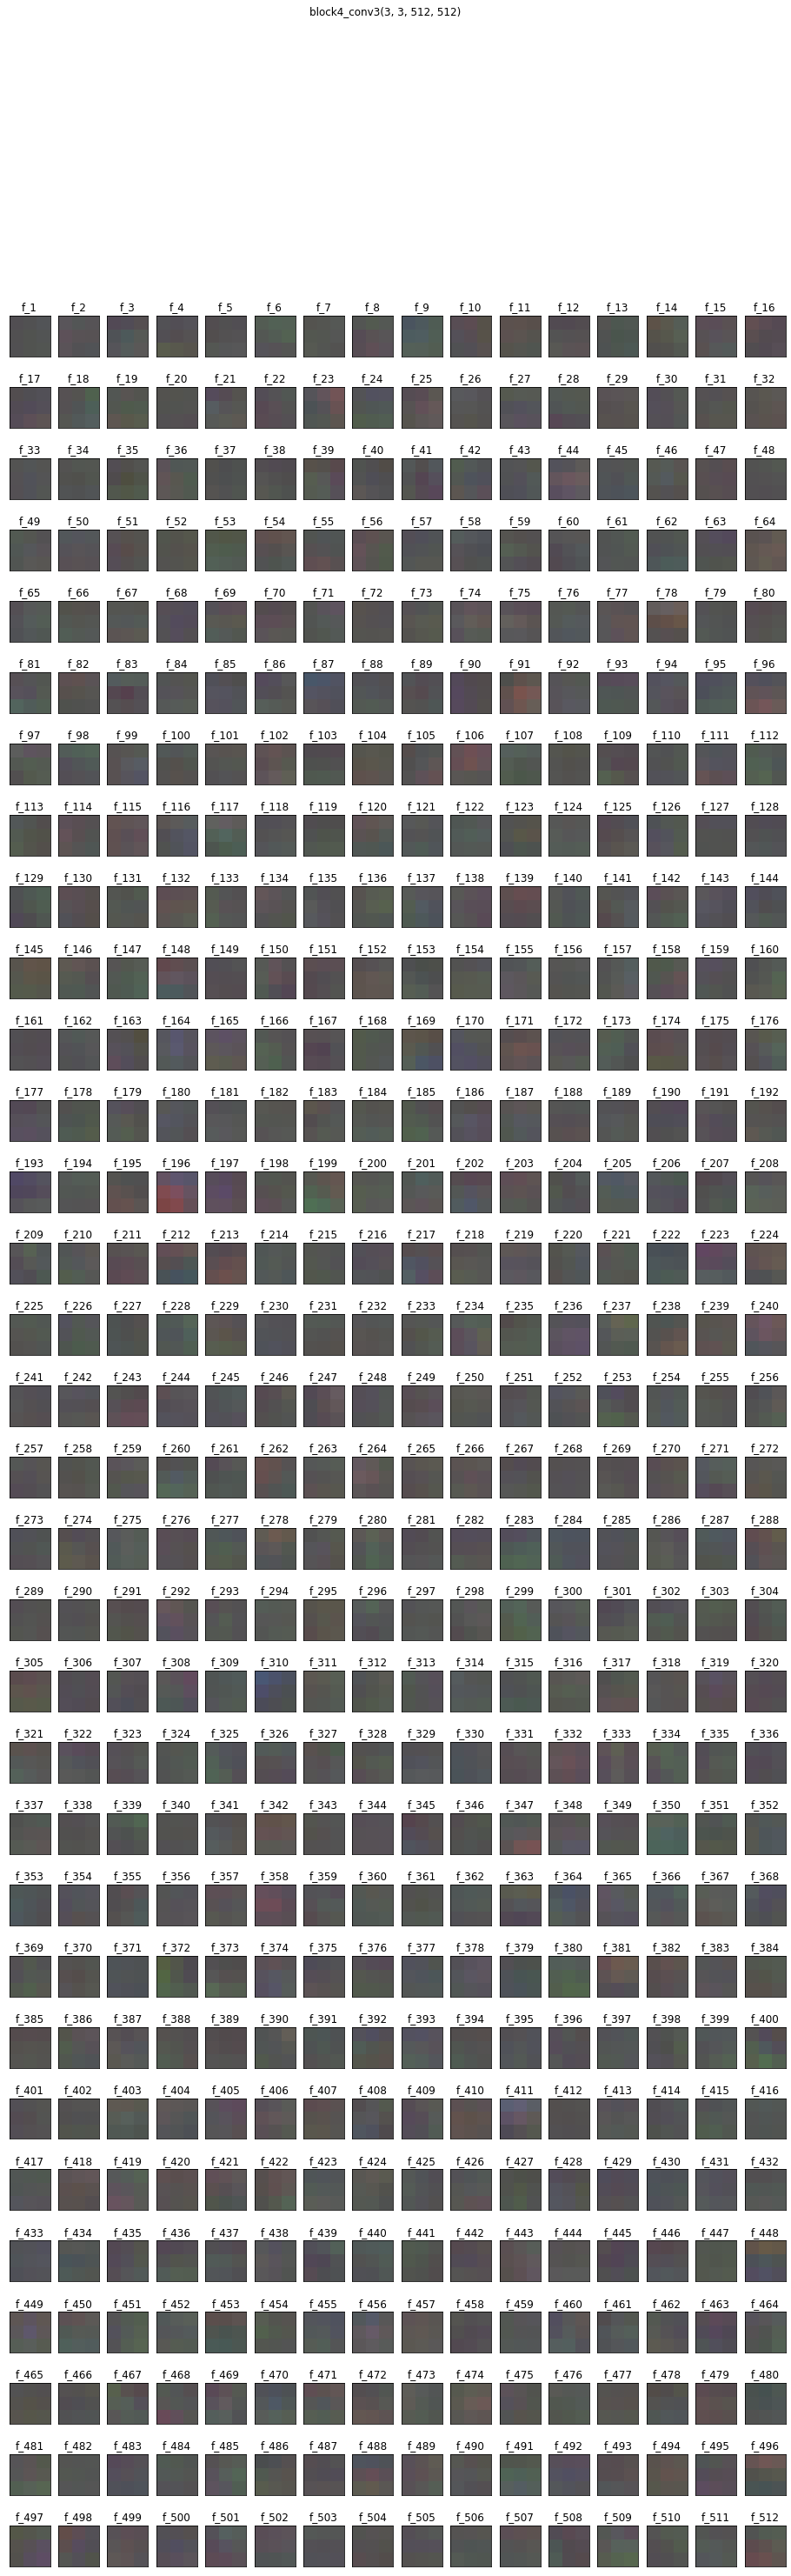

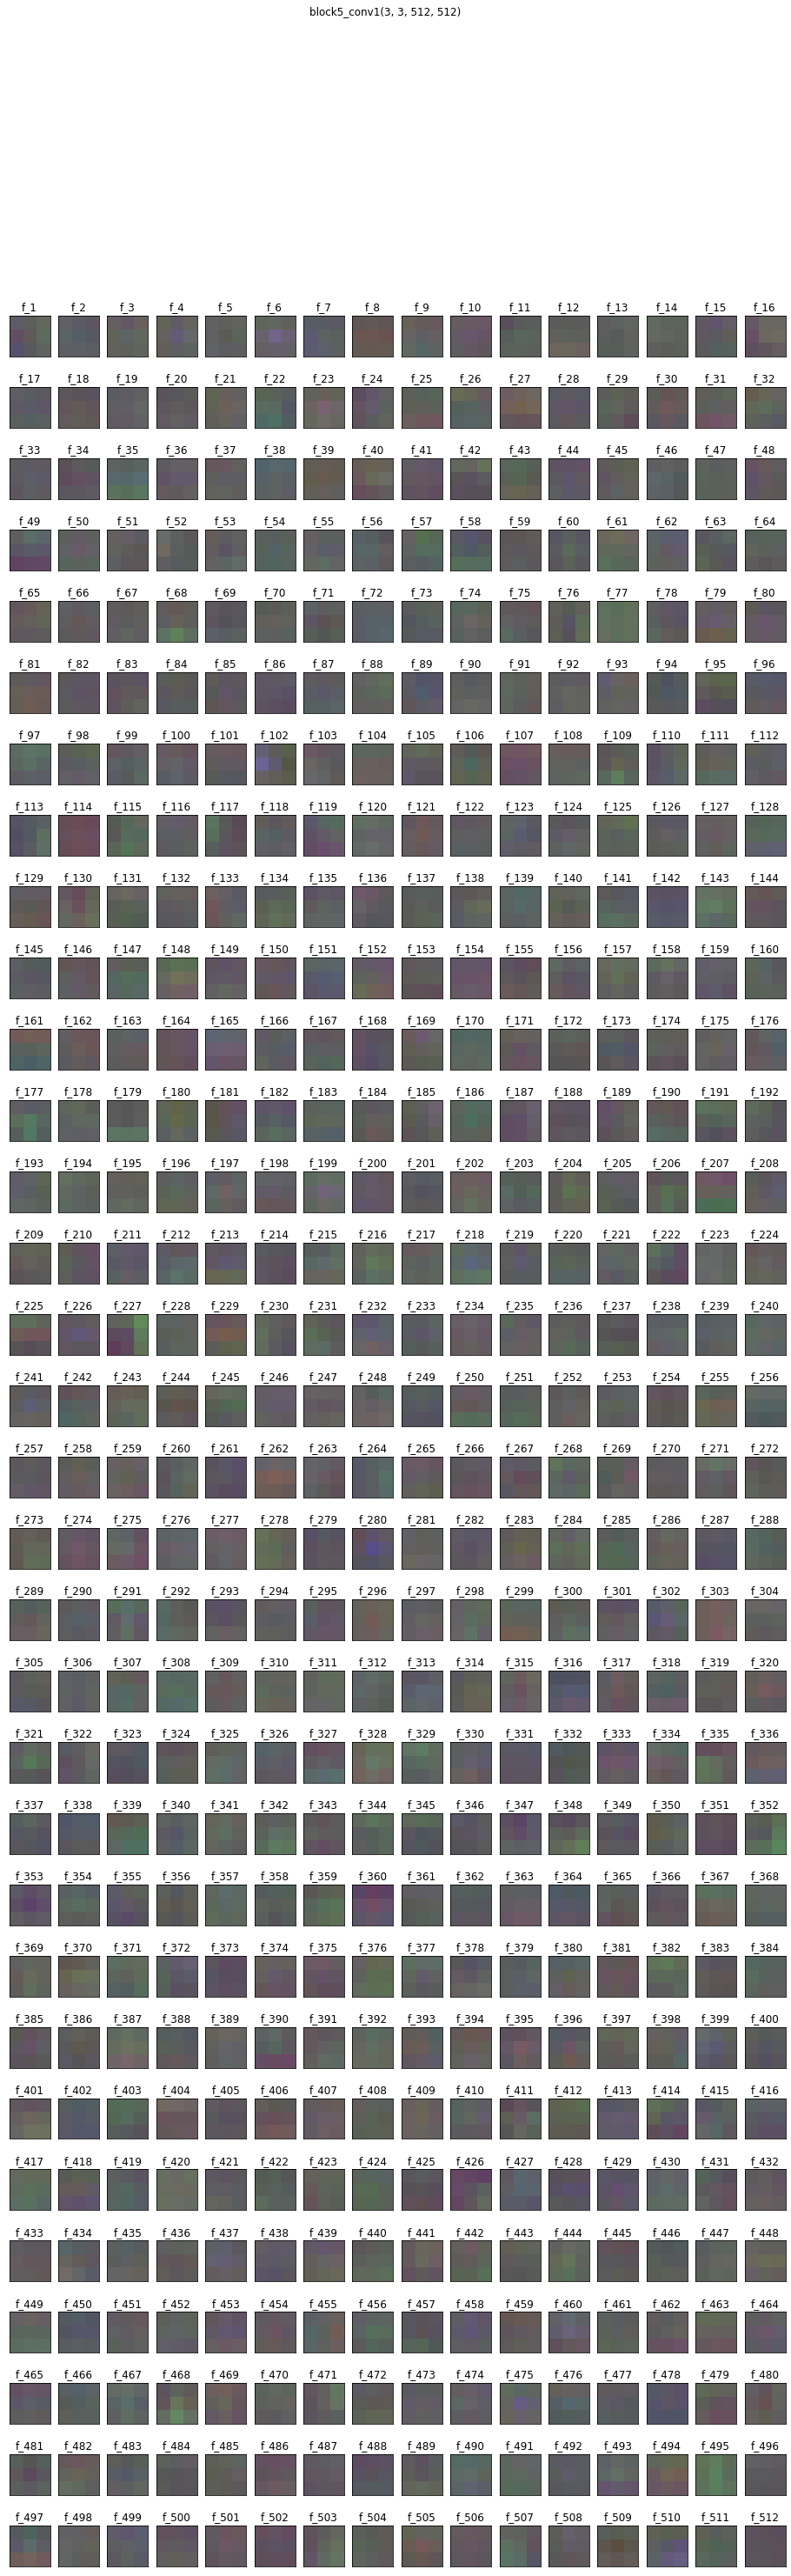

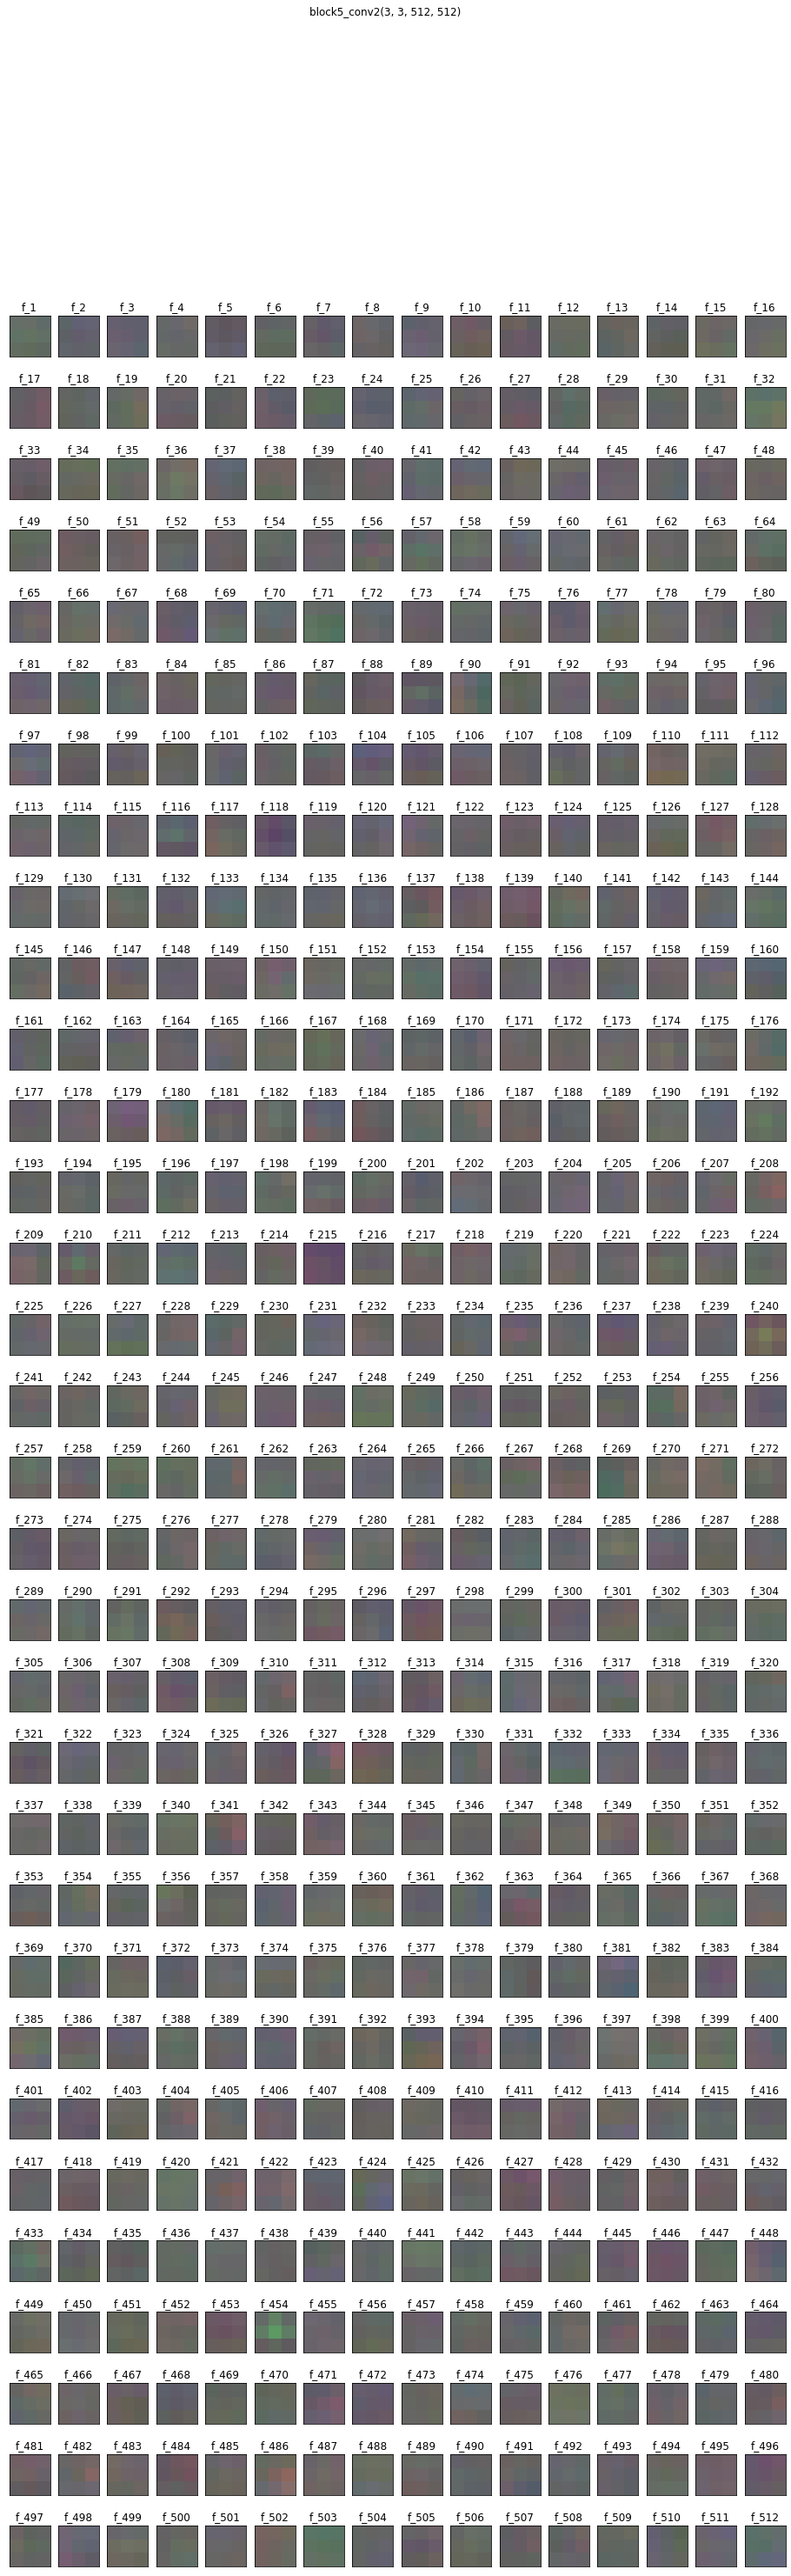

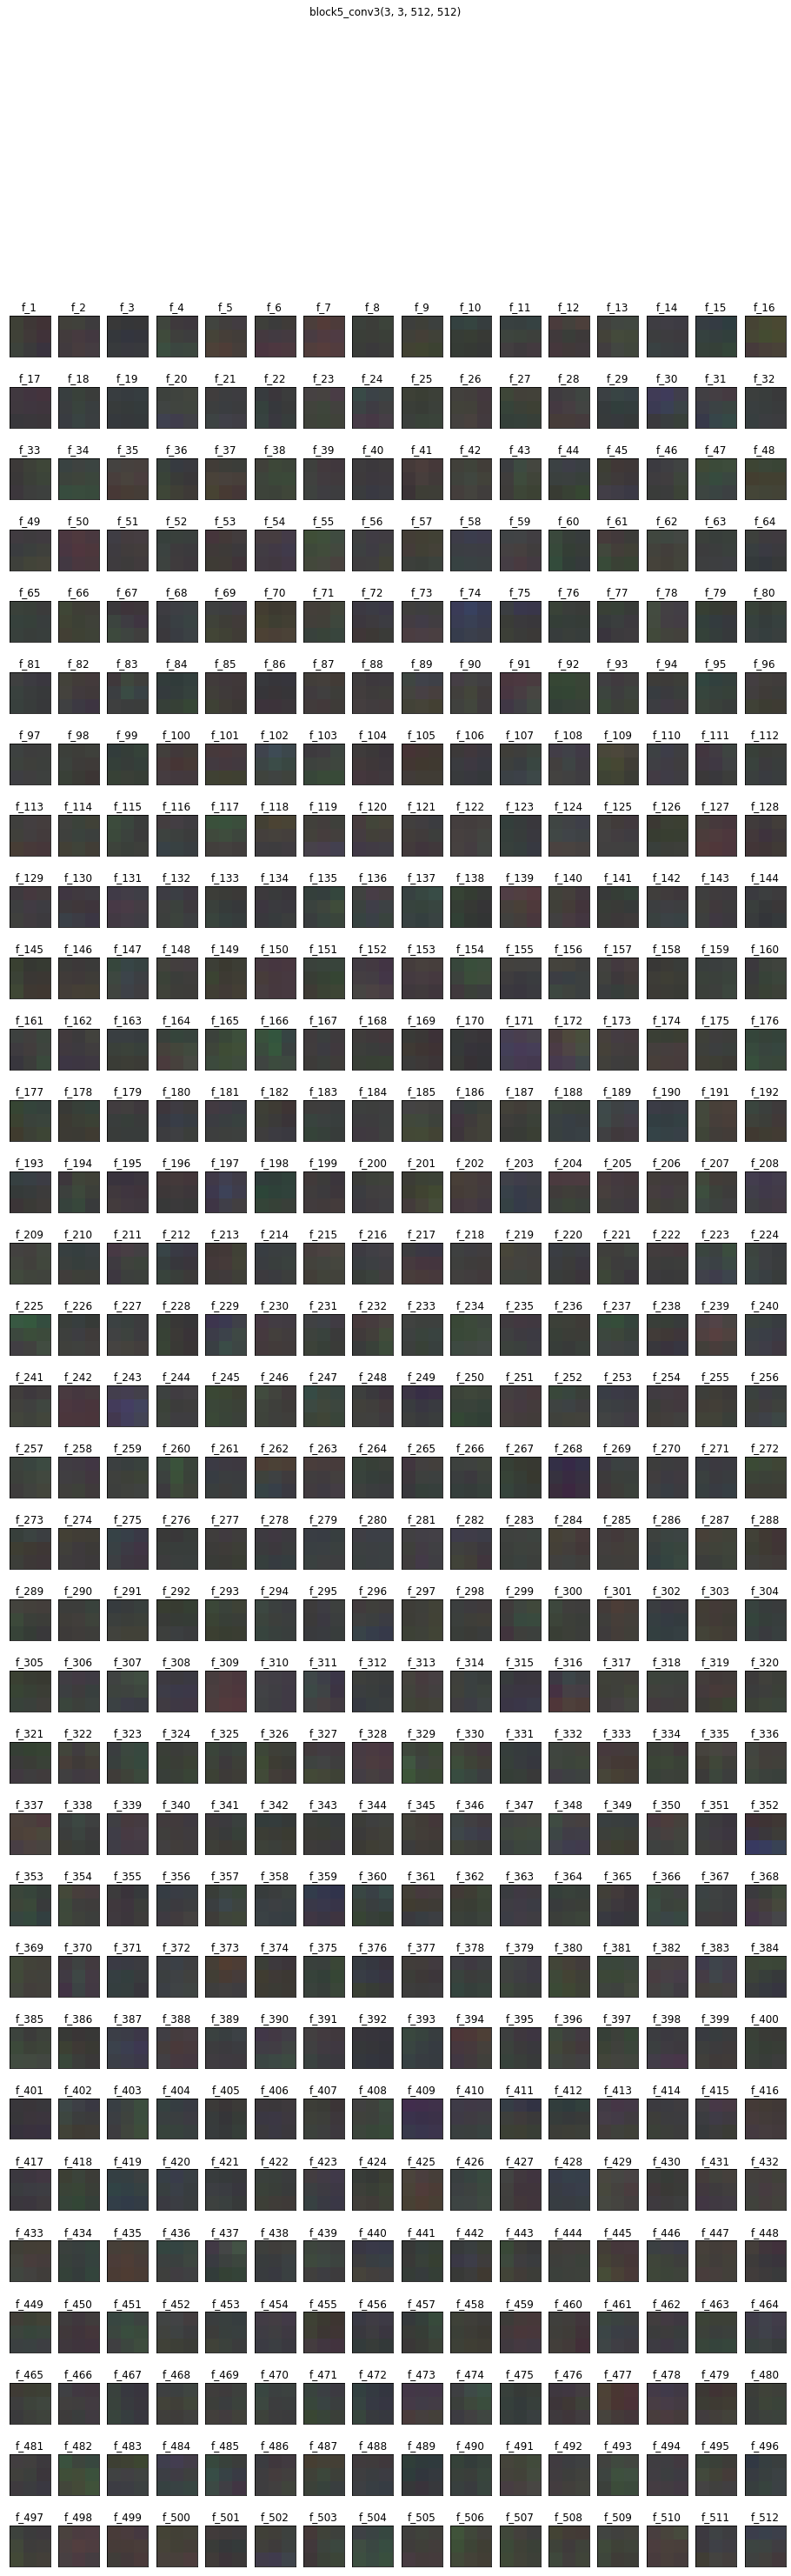

In [31]:
for layer in vgg.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()

        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)

        filter_cnt = 1
        
        rows = filters.shape[3] // 16
        cols = 16
        fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows * 1.5), subplot_kw={'xticks': [], 'yticks': []})
        feature_count = 0

        for ax in axs.flat:
          ax.imshow(filters[:, :, 0:3, feature_count], cmap='viridis')
          ax.set_title('f_' + str(feature_count+1))
          feature_count += 1

        plt.suptitle(str(layer.name) + str(weights.shape))
        plt.show()

# VGG para o conjunto de dados (Fine-tuning)
To be continued...

"Finetuning means taking weights of a trained neural network and use it as initialization for a new model being trained on data from the same domain (often e.g. images)". [Referência aqui](https://stats.stackexchange.com/questions/331369/what-is-meant-by-fine-tuning-of-neural-network).

In [58]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

## Pré-processando os dados

In [90]:
filenames = os.listdir('/content/data/train/train')
categories = []
for filename in filenames:
    if 'dog' in filename:
        categories.append('1')
    else:
        categories.append('0')

In [91]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

filename category
0  cat.5749.jpg        0
1  dog.1127.jpg        1
2  dog.4984.jpg        1
3  cat.4008.jpg        0
4  cat.7298.jpg        0

In [92]:
train_df, validate_df = train_test_split(df, test_size=0.1)

In [93]:
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

In [97]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [94]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    '/content/data/train/train', 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.


In [95]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    '/content/data/train/train', 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


## Instanciando o modelo

In [59]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [61]:
for layer in pre_trained_model.layers:
  print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


## Modificando o final da rede

In [72]:
from keras.layers import Dropout, Dense, Activation,GlobalMaxPooling2D
from keras import optimizers

In [63]:
for layer in pre_trained_model.layers[:15]:
  layer.trainable = False

for layer in pre_trained_model.layers[15:]:
  layer.trainable = True

In [67]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [70]:
x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

## Compilando e treinando

In [101]:
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history = model.fit(
  train_generator,
  epochs=epochs,
  validation_data=validation_generator,
  validation_steps=total_validate//batch_size,
  steps_per_epoch=total_train//batch_size)

Será finalizado o treinamento em breve...

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print(accuracy, loss)

Referências:

* https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c
* https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
* https://www.kaggle.com/c/dogs-vs-cats
* https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
* https://www.kaggle.com/code/bulentsiyah/dogs-vs-cats-classification-vgg16-fine-tuning